In [3]:
from rdkit.Chem import AllChem, MolFromSmiles, MolToSmiles, Draw
from rdkit.Chem.rdmolops import FastFindRings

from rdkit import Chem
from tqdm import tqdm
import pandas as pd
import numpy as np
import random
import itertools

from IPython.core.display import display, HTML
from rdkit.Chem.Draw import IPythonConsole
display(HTML("<style>.container { width:80% !important; }</style>"))
benzene = MolFromSmiles('c1ccccc1')

# Generate Directing Groups

Meta-Directing Groups:


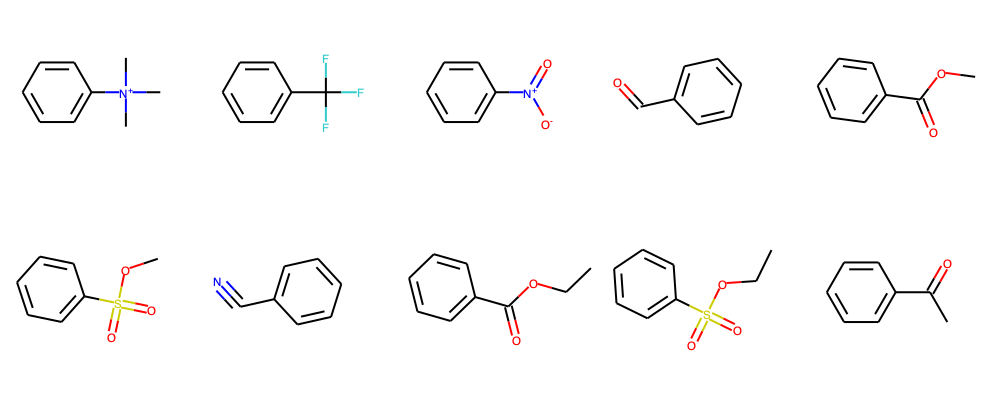

In [39]:
def gen_meta():
    meta1_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1][N+](C)(C)(C)')
    meta2_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]C(F)(F)(F)') #
    meta3_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1][N+]([O-])=O') #
    meta4_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]C=O') #
    meta5_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]C(=O)OC')
    meta6_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]S(=O)(=O)OC')
    meta7_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]C#N')
    meta8_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]C(=O)OCC')
    meta9_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]S(=O)(=O)OCC')
    meta10_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]C(=O)C')


    meta_mols = []
    meta_mols.append(meta1_rxn.RunReactants((benzene,))[0][0])
    meta_mols.append(meta2_rxn.RunReactants((benzene,))[0][0])
    meta_mols.append(meta3_rxn.RunReactants((benzene,))[0][0])
    meta_mols.append(meta4_rxn.RunReactants((benzene,))[0][0])
    meta_mols.append(meta5_rxn.RunReactants((benzene,))[0][0])
    meta_mols.append(meta6_rxn.RunReactants((benzene,))[0][0])
    meta_mols.append(meta7_rxn.RunReactants((benzene,))[0][0])
    meta_mols.append(meta8_rxn.RunReactants((benzene,))[0][0])
    meta_mols.append(meta9_rxn.RunReactants((benzene,))[0][0])
    meta_mols.append(meta10_rxn.RunReactants((benzene,))[0][0])
    
    return meta_mols

meta_mols = gen_meta()
for i,m in enumerate(meta_mols):
    tmp=AllChem.Compute2DCoords(m)
    m.UpdatePropertyCache()
    FastFindRings(m) #sanitation
print('Meta-Directing Groups:')
img = Draw.MolsToGridImage(meta_mols, molsPerRow=5)
img

Para-Directing Groups:


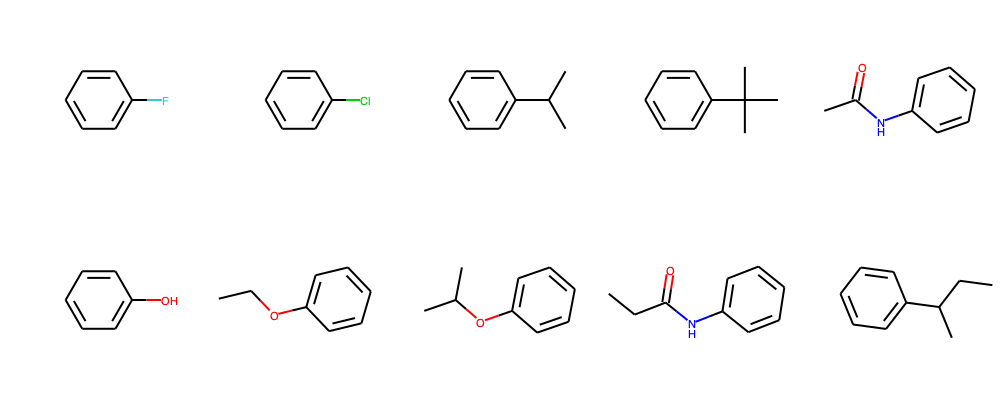

In [40]:
def gen_para():
    para1_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]F') #
    para2_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]Cl')
    para3_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]C(C)C')
    para4_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]C(C)(C)C')
    para5_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]NC(=O)C') #
    para6_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]O')
    para7_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]OCC') #
    para8_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]OC(C)C')
    para9_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]NC(=O)CC')
    para10_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]C(C)CC')



    para_mols = []
    para_mols.append(para1_rxn.RunReactants((benzene,))[0][0])
    para_mols.append(para2_rxn.RunReactants((benzene,))[0][0])
    para_mols.append(para3_rxn.RunReactants((benzene,))[0][0])
    para_mols.append(para4_rxn.RunReactants((benzene,))[0][0])
    para_mols.append(para5_rxn.RunReactants((benzene,))[0][0])
    para_mols.append(para6_rxn.RunReactants((benzene,))[0][0])
    para_mols.append(para7_rxn.RunReactants((benzene,))[0][0])
    para_mols.append(para8_rxn.RunReactants((benzene,))[0][0])
    para_mols.append(para9_rxn.RunReactants((benzene,))[0][0])
    para_mols.append(para10_rxn.RunReactants((benzene,))[0][0])
    
    return para_mols

para_mols = gen_para()
for i,m in enumerate(para_mols):
    tmp=AllChem.Compute2DCoords(m)
    m.UpdatePropertyCache()
    FastFindRings(m) #sanitation
    
print('Para-Directing Groups:')
img = Draw.MolsToGridImage(para_mols, molsPerRow=5)
img

# Some useful functions for enumerating reactions

In [6]:
def sanitize(mol):
    tmp=AllChem.Compute2DCoords(mol)
    mol.UpdatePropertyCache()
    FastFindRings(mol) #sanitation
    
def canonicalize(mol_list, showprogress=False):
    if showprogress:
        mol_list = [MolFromSmiles(MolToSmiles(mol)) for mol in tqdm(mol_list)]
    else:
        mol_list = [MolFromSmiles(MolToSmiles(mol)) for mol in mol_list] 
    mol_list = [mol for mol in mol_list if mol]
    mol_list = list(set([MolToSmiles(mol) for mol in mol_list]))
    if showprogress:
        mol_list = [MolFromSmiles(smi) for smi in tqdm(mol_list)]
    else:
        mol_list = [MolFromSmiles(smi) for smi in mol_list]
    return mol_list

def simple_rxn(mol_list, rxn, debug=False):
    prod_list = []
    for mol in mol_list:
        if debug:
            print('Input: '+ MolToSmiles(mol))
        products = rxn.RunReactants((mol,))
        if debug:
            print('Products: {}'.format(products))
        if products != ():
            for prod in products:
                if debug:
                    logging.info(prod)
                    logging.info(MolToSmiles(prod[0]))
                # prod_list.append(MolToSmiles(prod[0]))
                output = prod[0]
                try:
                    sanitize(output)
                    prod_list.append((output))
                except:
                    continue
    return canonicalize(prod_list)


# Generate straight carbon skeletons with N carbons and M double bonds

For the training sets, N = 2-8 and M = 1

For the balanced test set, N = 9-10 and M = 0

Length of list after adding 1 carbon(s): 2
Length of list after adding 2 carbon(s): 5
Length of list after adding 3 carbon(s): 11
Length of list after adding 4 carbon(s): 22
Length of list after adding 5 carbon(s): 42
Length of list after adding 6 carbon(s): 80
Length of list after adding 1 double bond(s): 196

Some examples:


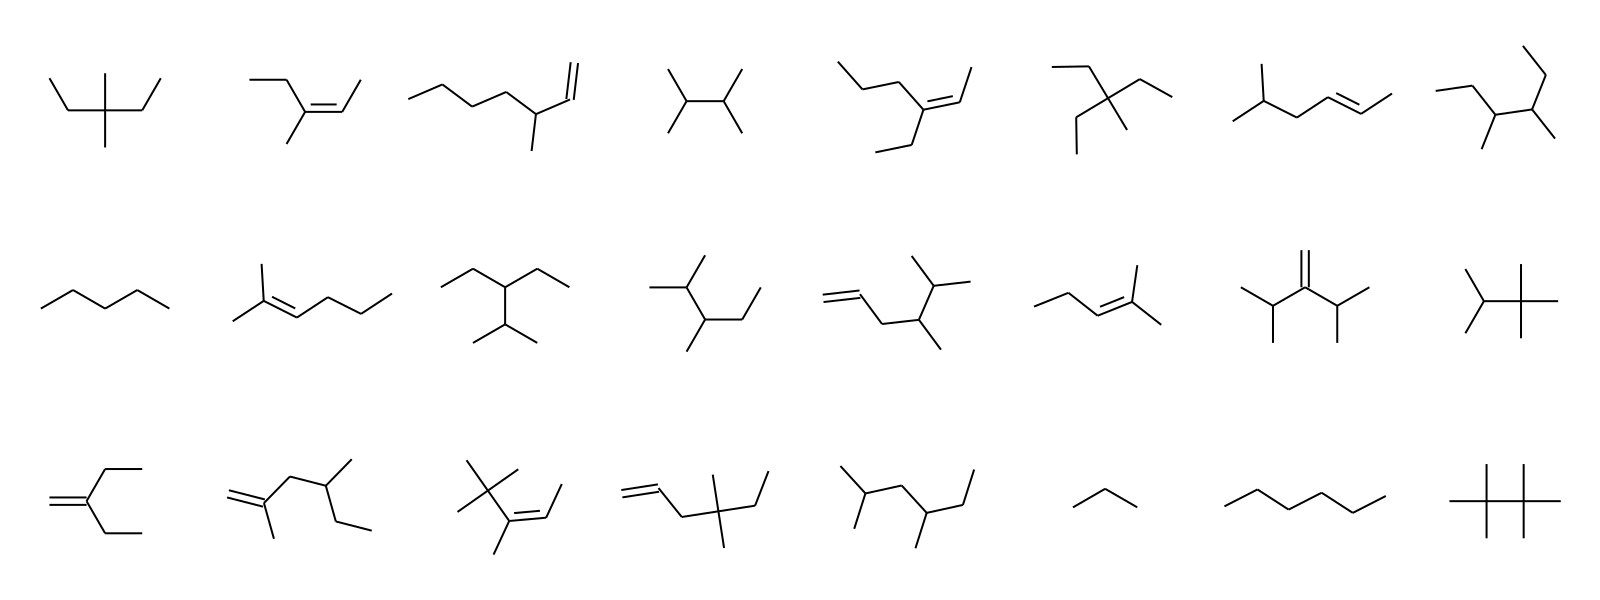

In [42]:
def gen_carbons(test=False):

    add_carbon = AllChem.ReactionFromSmarts('[C!H0:1] >> [C:1]C')
    single_to_double = AllChem.ReactionFromSmarts('[C!H0!R:1][C!H0!R:2] >> [C:1]=[C:2]')

    if not test:
        input = MolFromSmiles('CC')
        skeletons = [input]
        for i in range(6):
            prods = simple_rxn(skeletons, add_carbon)
            skeletons = skeletons + prods
            print('Length of list after adding {} carbon(s): {}'.format(i+1,len(skeletons)))
        for i in range(1):
            doubles = simple_rxn(skeletons, single_to_double)
            skeletons = skeletons + doubles
            print('Length of list after adding {} double bond(s): {}'.format(i+1,len(skeletons))) 
    else:
        input = MolFromSmiles('CCCCCCCC')
        skeletons = [input]
        for i in range(2):
            prods = simple_rxn(skeletons, add_carbon)
            skeletons = skeletons + prods
            print('Length of list after adding {} carbon: {}'.format(i+1,len(skeletons)))
    return skeletons

skeletons = gen_carbons()

print('\nSome examples:')
img = Draw.MolsToGridImage(random.sample(skeletons,24), molsPerRow=8)
img

### Next, we randomly add acid chlorides to sp3 carbons with 3 hydrogens

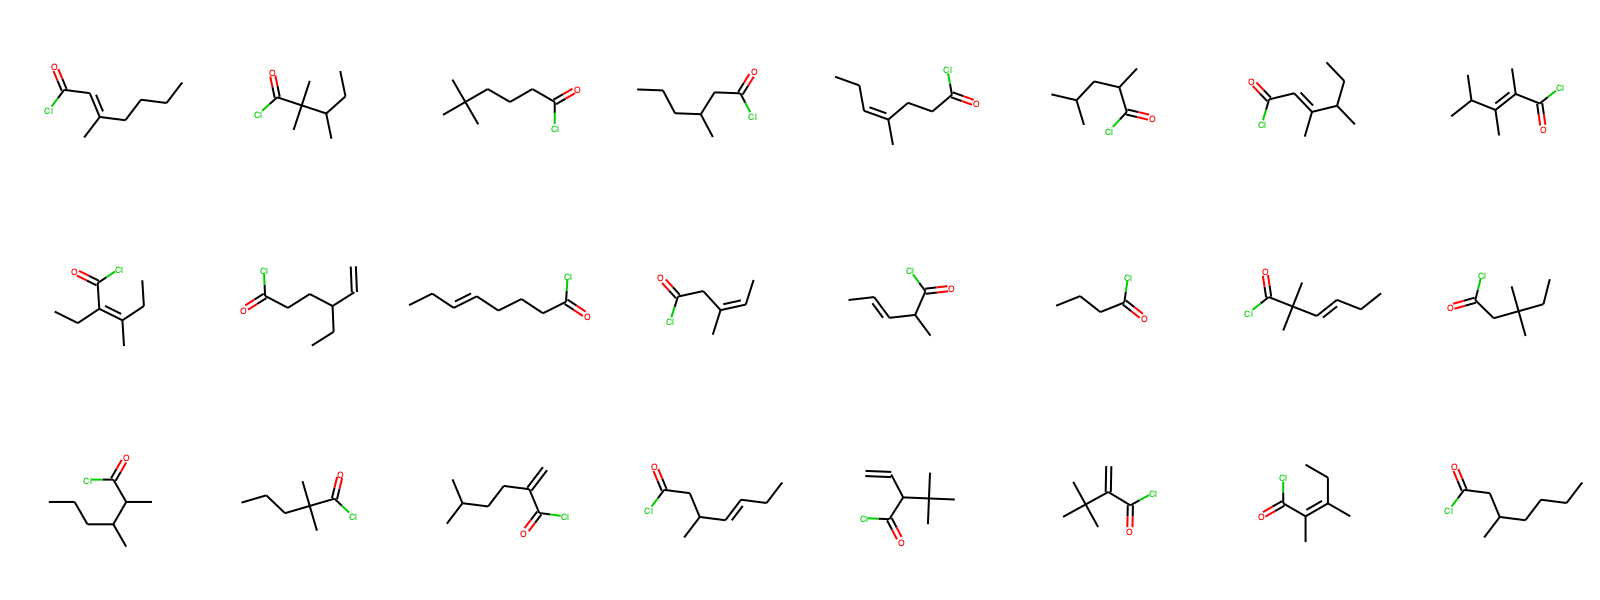

In [46]:
def gen_acids(skeletons):
    add_acid = AllChem.ReactionFromSmarts('[CH3:1] >> [CH0:1](=O)Cl')
    acids = simple_rxn(skeletons,add_acid)

    print('Original number of carbon skeletons: {}'.format(len(skeletons)))
    print('Number of acid chlorides: {}'.format(len(acids)))
    
    return acids

img = Draw.MolsToGridImage(random.sample(acids,24), molsPerRow=8)
img

### Finally, combine the acid chlorides with the para- and meta- directing groups separately to generate two lists of reactant-reagent strings

Uncomment lines with `train_test_split` to generate biased or superbiased training sets

In [55]:
from sklearn.model_selection import train_test_split

para_mols = gen_para()
meta_mols = gen_meta()

# Uncomment these to generate balanced training set:
print('Generating balanced training set...\n')
skeletons = gen_carbons()
acids = gen_acids(skeletons)
para_acids = acids
meta_acids = acids

# Uncomment this to generate biased training set:
# print('Generating biased training set...\n')
# skeletons = gen_carbons()
# acids = gen_acids(skeletons)
# para_acids, meta_acids = train_test_split(acids, test_size=0.1)

# Uncomment this to generate super_biased training set
# print('Generating super biased training set...\n')
# skeletons = gen_carbons()
# acids = gen_acids(skeletons)
# para_acids, meta_acids = train_test_split(acids, test_size=0.03)
# meta_mols = [meta_mols[1], meta_mols[2], meta_mols[3]]

# Uncomment this to generate balanced test set
# print('Generating balanced test set...\n')
# skeletons = gen_carbons(test=True)
# acids = gen_acids(skeletons)
# para_acids = acids
# meta_acids = acids
# meta_mols = [meta_mols[1], meta_mols[2], meta_mols[3]]
# para_mols = [para_mols[0], para_mols[4], para_mols[6]]


para_srcs = []
for para_mol in para_mols:
    para = MolToSmiles(para_mol)
    for acid in para_acids:
        acid = MolToSmiles(acid)
        para_srcs.append(MolToSmiles(MolFromSmiles(para+'.'+acid)))

meta_srcs = []
for meta_mol in meta_mols:
    meta = MolToSmiles(meta_mol)
    for acid in meta_acids:
        acid = MolToSmiles(acid)
        meta_srcs.append(MolToSmiles(MolFromSmiles(meta+'.'+acid)))
        
print('\nNumber of para-directing srcs: {}'.format(len(para_srcs)))
print('Number of meta-directing srcs: {}'.format(len(meta_srcs)))

Generating super biased training set...

Length of list after adding 1 carbon(s): 2
Length of list after adding 2 carbon(s): 5
Length of list after adding 3 carbon(s): 11
Length of list after adding 4 carbon(s): 22
Length of list after adding 5 carbon(s): 42
Length of list after adding 6 carbon(s): 80
Length of list after adding 1 double bond(s): 196
Original number of carbon skeletons: 196
Number of acid chlorides: 310

Number of para-directing srcs: 3000
Number of meta-directing srcs: 30


### Apply para- or meta- reaction templates to the lists of reactant-reagent strings

In [57]:
para_rxn = AllChem.ReactionFromSmarts('[*:1]-!:[c:2]1[c:3][c:4][c:5][c:6][c:7]1.[C:8](=[O:9])Cl>>[*:1]-!:[c:2]1[c:3][c:4][c:5]([C:8](=[O:9]))[c:6][c:7]1')
meta_rxn = AllChem.ReactionFromSmarts('[*:1]-!:[c:2]1[c:3][c:4][c:5][c:6][c:7]1.[C:8](=[O:9])Cl>>[*:1]-!:[c:2]1[c:3][c:4]([C:8](=[O:9]))[c:5][c:6][c:7]1')

def run_parameta(src, rxn):
    src_list = src.split('.')
    src_mols = [MolFromSmiles(mol) for mol in src_list]
    pred_list = []
    for pair in itertools.permutations(src_mols, r=2): # iterate over all src reactant pairings
        prods = rxn.RunReactants((pair[0],pair[1]))
        if prods!=():
            for mol in prods:
                pred_list.append(mol[0])
    return canonicalize(pred_list)[0]

para_prods=[]
for src in tqdm(para_srcs):
    para_prods.append(MolToSmiles(run_parameta(src, para_rxn)))
para_srcs = [src+'.'+'Cl[Al](Cl)Cl' for src in para_srcs]

meta_prods=[]
for src in tqdm(meta_srcs):
    meta_prods.append(MolToSmiles(run_parameta(src, meta_rxn)))
meta_srcs = [src+'.'+'Cl[Al](Cl)Cl' for src in meta_srcs]

100%|██████████| 30/30 [00:00<00:00, 820.08it/s]


### Define some functions for tokenization and augmentation

In [58]:
"""Script to remove duplicate reactions and unphysical products"""
from rdkit import RDLogger
import re

def smi_list_tokenizer(smi_list):
    """
    Tokenize a SMILES molecule or reaction
    """
    pattern = "(\[[^\]]+]|Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\(|\)|\.|=|#|-|\+|\\\\|\/|:|~|@|\?|>|\*|\$|\%[0-9]{2}|[0-9])"
    regex = re.compile(pattern)
    smi_list_tokenized = []
    for smi in smi_list:
        tokens = [token for token in regex.findall(smi)]
        assert smi == ''.join(tokens)
        smi_list_tokenized.append(' '.join(tokens))
    return smi_list_tokenized


def data_augm(rx_list):
    RDLogger.DisableLog('rdApp.*')
    rx_list_augm = rx_list.copy()
    for j, rx in enumerate(rx_list):
        rx_rand = rx
        i = 0
        while rx == rx_rand and i < 10:
            rx_mol = Chem.MolFromSmiles(rx)
            if rx_mol == None:
                print(rx)
            new_atom_order = list(range(rx_mol.GetNumAtoms()))
            random.shuffle(new_atom_order)
            random_mol = Chem.RenumberAtoms(rx_mol, newOrder=new_atom_order)
            rx_rand = Chem.MolToSmiles(random_mol, canonical=False, isomericSmiles=False)
            i += 1
        if rx_rand == rx:
            print('\nFailed to generate random equivalent SMILES for the reaction:')
            print(rx)
        else:
            rx_list_augm.append(rx_rand)
    return rx_list_augm

def remove_last_char(rx_list):
    new_list = []
    for rx in rx_list:
        new_list.append(rx.rstrip('\n'))
    return new_list

### Split into train/val/test, augment + tokenize training set, only tokenize val and test sets

In [59]:
from sklearn.model_selection import train_test_split

para_src_train, para_src_test, para_tgt_train, para_tgt_test = train_test_split(para_srcs, para_prods,test_size=0.1)
para_src_train, para_src_val, para_tgt_train, para_tgt_val = train_test_split(para_src_train, para_tgt_train, test_size=0.111111)
meta_src_train, meta_src_test, meta_tgt_train, meta_tgt_test = train_test_split(meta_srcs, meta_prods, test_size=0.1)
meta_src_train, meta_src_val, meta_tgt_train, meta_tgt_val = train_test_split(meta_src_train, meta_tgt_train, test_size=0.111111)

train_rxns=[]
tokenized_para_srcs_train = smi_list_tokenizer(data_augm(para_src_train))
tokenized_para_prods_train = smi_list_tokenizer(para_tgt_train)
tokenized_para_prods_train = tokenized_para_prods_train + tokenized_para_prods_train
for i, src in tqdm(enumerate(tokenized_para_srcs_train), total = len(tokenized_para_srcs_train)):
    rxn = src+'>>'+tokenized_para_prods_train[i]
    train_rxns.append(rxn)
    
tokenized_meta_srcs_train = smi_list_tokenizer(data_augm(meta_src_train))
tokenized_meta_prods_train = smi_list_tokenizer(meta_tgt_train)
tokenized_meta_prods_train = tokenized_meta_prods_train + tokenized_meta_prods_train
for i, src in tqdm(enumerate(tokenized_meta_srcs_train), total = len(tokenized_meta_srcs_train)):
    rxn = src+'>>'+tokenized_meta_prods_train[i]
    train_rxns.append(rxn)
    
val_rxns=[]
tokenized_para_srcs_val = smi_list_tokenizer(para_src_val)
tokenized_para_prods_val = smi_list_tokenizer(para_tgt_val)
tokenized_para_prods_val = tokenized_para_prods_val
for i, src in tqdm(enumerate(tokenized_para_srcs_val), total = len(tokenized_para_srcs_val)):
    rxn = src+'>>'+tokenized_para_prods_val[i]
    val_rxns.append(rxn)
    
tokenized_meta_srcs_val = smi_list_tokenizer(meta_src_val)
tokenized_meta_prods_val = smi_list_tokenizer(meta_tgt_val)
tokenized_meta_prods_val = tokenized_meta_prods_val
for i, src in tqdm(enumerate(tokenized_meta_srcs_val), total = len(tokenized_meta_srcs_val)):
    rxn = src+'>>'+tokenized_meta_prods_val[i]
    val_rxns.append(rxn)
    
test_rxns=[]
tokenized_para_srcs_test = smi_list_tokenizer(para_src_test)
tokenized_para_prods_test = smi_list_tokenizer(para_tgt_test)
tokenized_para_prods_test = tokenized_para_prods_test
for i, src in tqdm(enumerate(tokenized_para_srcs_test), total = len(tokenized_para_srcs_test)):
    rxn = src+'>>'+tokenized_para_prods_test[i]
    test_rxns.append(rxn)
    
tokenized_meta_srcs_test = smi_list_tokenizer(meta_src_test)
tokenized_meta_prods_test = smi_list_tokenizer(meta_tgt_test)
tokenized_meta_prods_test = tokenized_meta_prods_test
for i, src in tqdm(enumerate(tokenized_meta_srcs_test), total = len(tokenized_meta_srcs_test)):
    rxn = src+'>>'+tokenized_meta_prods_test[i]
    test_rxns.append(rxn)

100%|██████████| 3/3 [00:00<00:00, 9649.47it/s]


In [26]:
import os

# Choose which dataset you are generating:
with open('sear/balanced/train.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % rxn for rxn in train_rxns)
with open('sear/balanced/val.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % rxn for rxn in val_rxns)
with open('sear/balanced/test.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % rxn for rxn in test_rxns)
    
with open('sear/biased/train.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % rxn for rxn in train_rxns)
with open('sear/biased/val.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % rxn for rxn in val_rxns)
with open('sear/biased/test.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % rxn for rxn in test_rxns)
    
with open('sear/super_biased/train.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % rxn for rxn in train_rxns)
with open('sear/super_biased/val.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % rxn for rxn in val_rxns)
with open('sear/super_biased/test.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % rxn for rxn in test_rxns)

with open('sear/benchmark/benchmark.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % rxn for rxn in test_rxns)
    
# run split_src_tgt.sh in their respective folders to split into src.txt and tgt.txt files